In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import preprocessing


In [2]:
covidFirstDose = pd.read_csv("covid_first_dose.csv")
covidSecondDose = pd.read_csv("covid_second_dose.csv")
covidData = pd.read_csv("covid_dataset.csv")



In [3]:
x = covidFirstDose[['Day', 'Number of Vaccinations (First Dose)']]
m = covidSecondDose[['Day', 'Number of Vaccinations (Second Dose)']]
c = covidData[['Day', 'Lab Test' , 'Confirmed case', 'Death Case' ]]




In [4]:
a = x.merge(m, on='Day', how='inner')




In [5]:
z= pd.merge(a, c, on='Day', how='left')

In [6]:
z

,Day,Number of Vaccinations (First Dose),Number of Vaccinations (Second Dose),Lab Test,Confirmed case,Death Case
0,2021-04-08,14804,81323,33193,6854,74
1,2021-04-10,19943,136703,26077,5343,77
2,2021-04-11,23657,165691,29376,5819,78
3,2021-04-12,22456,138879,34968,7201,83
4,2021-04-13,26750,210579,32955,6028,69
...,...,...,...,...,...,...
183,2021-12-13,325250,355796,22037,385,3
184,2021-12-14,338574,570312,22870,295,3
185,2021-12-15,367004,565635,28153,297,4
186,2021-12-18,363539,927256,13991,122,4


In [7]:
label_encoder = preprocessing.LabelEncoder()
 
z['Day']= label_encoder.fit_transform(z['Day']) 
print(z.head(158))

     Day  Number of Vaccinations (First Dose)  \
0      0                                14804   
1      1                                19943   
2      2                                23657   
3      3                                22456   
4      4                                26750   
..   ...                                  ...   
153  153                              1049734   
154  154                               985671   
155  155                                 2530   
156  156                               217057   
157  157                               284511   

     Number of Vaccinations (Second Dose)  Lab Test  Confirmed case  \
0                                   81323     33193            6854   
1                                  136703     26077            5343   
2                                  165691     29376            5819   
3                                  138879     34968            7201   
4                                  210579     32955     

In [8]:
z.shape

(188, 6)

In [9]:
z.columns

Index(['Day', 'Number of Vaccinations (First Dose)',
       'Number of Vaccinations (Second Dose)', 'Lab Test', 'Confirmed case',
       'Death Case'],
      dtype='object')

In [10]:
X = z.iloc[:, 0:3]
y = z['Death Case']

In [11]:
X

,Day,Number of Vaccinations (First Dose),Number of Vaccinations (Second Dose)
0,0,14804,81323
1,1,19943,136703
2,2,23657,165691
3,3,22456,138879
4,4,26750,210579
...,...,...,...
183,183,325250,355796
184,184,338574,570312
185,185,367004,565635
186,186,363539,927256


In [12]:
X.shape


(188, 3)

In [13]:
y.shape

(188,)

In [14]:
X

,Day,Number of Vaccinations (First Dose),Number of Vaccinations (Second Dose)
0,0,14804,81323
1,1,19943,136703
2,2,23657,165691
3,3,22456,138879
4,4,26750,210579
...,...,...,...
183,183,325250,355796
184,184,338574,570312
185,185,367004,565635
186,186,363539,927256


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [16]:
X_train.shape

(150, 3)

In [17]:
X_test.shape

(38, 3)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
y_pred


array([  4.57,   4.5 ,   6.28,   5.7 , 120.28,  25.21,  96.88,  77.35,
        59.9 ,  14.35, 165.58,   9.08,  25.99,   4.62, 223.56,   5.61,
         2.48,  67.73,   2.05, 169.63, 232.72, 100.06, 100.51, 106.13,
         1.66,  19.22,  36.89,  56.25,  17.24,   4.23, 230.95,  81.51,
         2.47,  17.01,   2.72, 224.99, 217.69,  18.1 ])

In [19]:
X_test

,Day,Number of Vaccinations (First Dose),Number of Vaccinations (Second Dose)
156,156,217057,270573
157,157,284511,338715
140,140,330868,247274
145,145,310415,327098
46,46,4120,703
112,112,345438,255841
11,11,16784,151988
15,15,325,120861
99,99,226451,2708469
128,128,320207,163401


In [20]:
 rf.predict([[99, 161491, 120861]])

array([56.91])

In [21]:
X_test['Number of Vaccinations (First Dose)'] = sorted(X_test['Number of Vaccinations (First Dose)'])
X_test['Number of Vaccinations (Second Dose)'] = sorted(X_test['Number of Vaccinations (Second Dose)'])


<ipython-input-21-3762dcc6e789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Number of Vaccinations (First Dose)'] = sorted(X_test['Number of Vaccinations (First Dose)'])
<ipython-input-21-3762dcc6e789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Number of Vaccinations (Second Dose)'] = sorted(X_test['Number of Vaccinations (Second Dose)'])


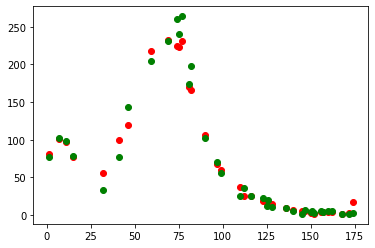

In [22]:
plt.scatter(X_test['Day'], y_pred, color="r")
plt.scatter(X_test['Day'], y_test, color="g")

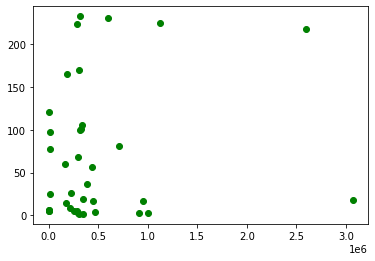

In [23]:
plt.scatter(X_test['Number of Vaccinations (First Dose)'], y_pred, color="g")


In [24]:
from sklearn import metrics

metrics.mean_squared_error(y_test, y_pred)

161.11755789473685

In [25]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

12.693209125147858